In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(style="whitegrid")

In [3]:
df=pd.read_csv('BankChurners.csv')

In [4]:
print("Shape of Application Data is: ",end=" ")
print(df.shape)

Shape of Application Data is:  (10127, 23)


In [5]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [6]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


As it's mentioned in teh description to ignore the last two columns, we'll drop these columns

In [7]:
new_columns=list(df.columns.values)[:-2]
df=df.loc[:,new_columns]

### Cleaning the Dataset

In [8]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### The data has no missing values

### Checking Datatypes`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [10]:
df.select_dtypes("object").head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue


In [11]:
df.select_dtypes("int64").head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,45,3,39,5,1,3,777,1144,42
1,818770008,49,5,44,6,1,2,864,1291,33
2,713982108,51,3,36,4,1,0,0,1887,20
3,769911858,40,4,34,3,4,1,2517,1171,20
4,709106358,40,3,21,5,1,0,0,816,28


In [12]:
df.select_dtypes("float").head()

,Credit_Limit,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,12691.0,11914.0,1.335,1.625,0.061
1,8256.0,7392.0,1.541,3.714,0.105
2,3418.0,3418.0,2.594,2.333,0.000
3,3313.0,796.0,1.405,2.333,0.760
4,4716.0,4716.0,2.175,2.500,0.000


No problem seems to appear in the datatypes of the variables and hence we proceed further

### Checking for outliers

In [13]:
numerical=list(df.select_dtypes("float").columns.values)+list(df.select_dtypes("int64").columns.values)

In [14]:
numerical

['Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Total_Revolving_Bal',
 'Total_Trans_Amt',
 'Total_Trans_Ct']

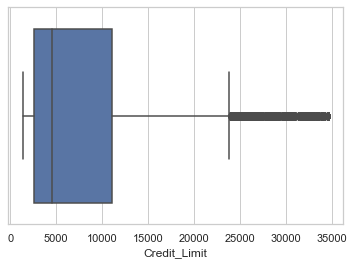

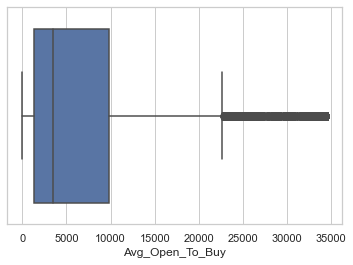

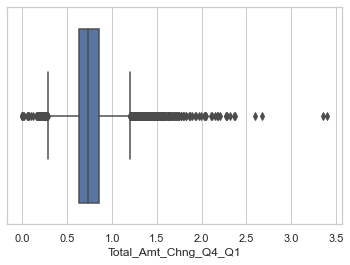

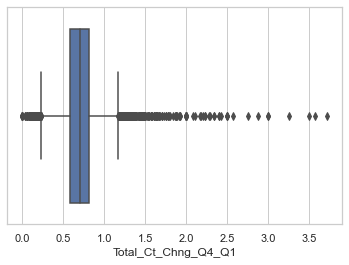

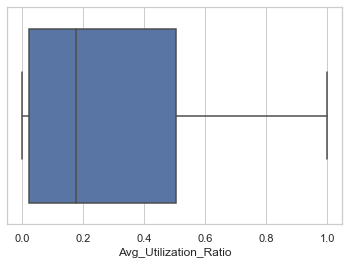

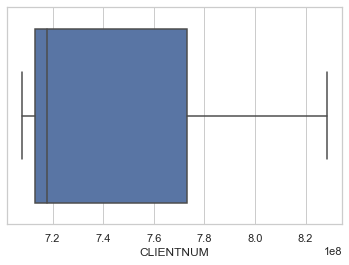

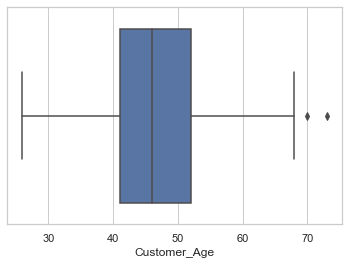

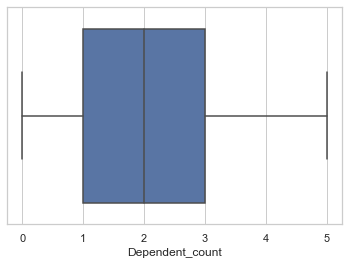

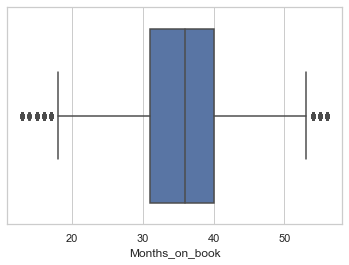

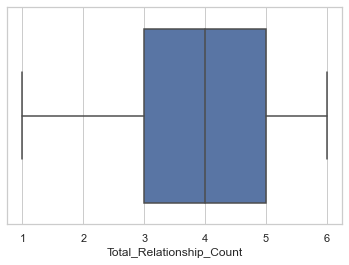

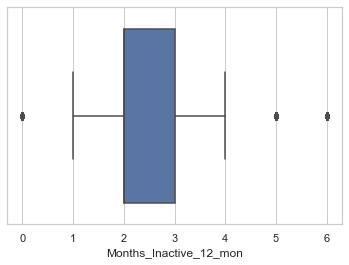

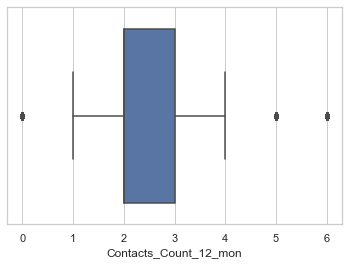

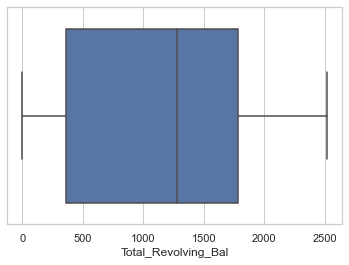

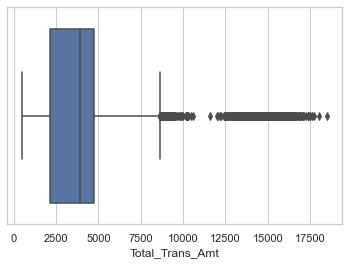

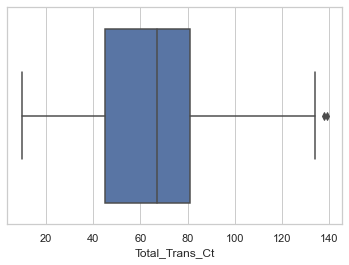

In [15]:
for i in numerical:
    sns.boxplot(df[i])
    plt.show()

We see there are outliers in the data which need to be treated.

We will apply capping and flooring technique for the variables:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1','Customer_Age', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [17]:
candf= ['Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']

In [18]:
for i in candf:
    percentiles = df[i].quantile([0.05,0.95]).values
    df[i][df[i] <= percentiles[0]] = percentiles[0]
    df[i][df[i] >= percentiles[1]] = percentiles[1]

In [19]:
cap=['Total_Trans_Ct','Total_Trans_Amt','Customer_Age','Credit_Limit', 'Avg_Open_To_Buy']

In [20]:
for i in cap:
    df[i][df[i] >= df[i].quantile(0.95)]= df[i].quantile(0.95)


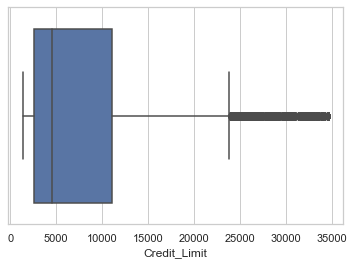

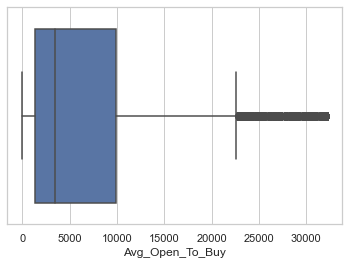

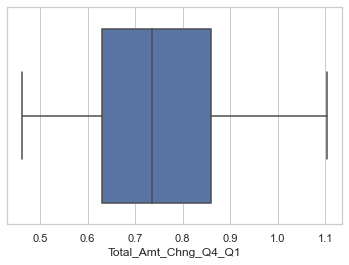

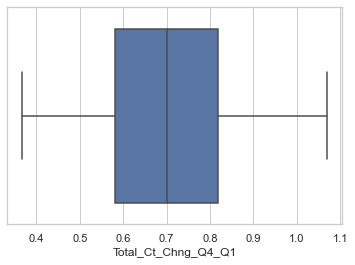

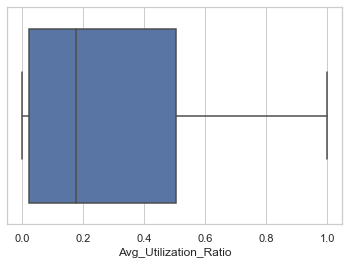

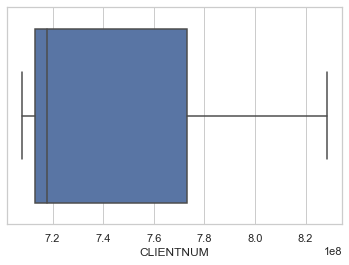

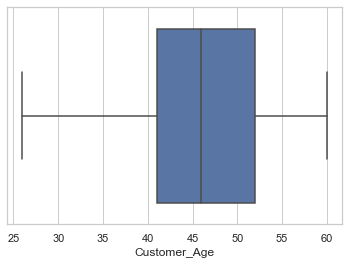

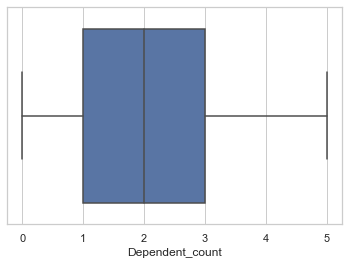

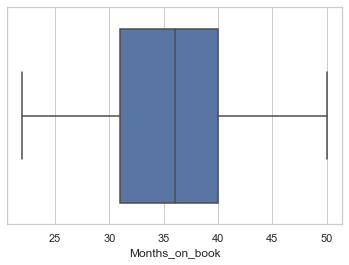

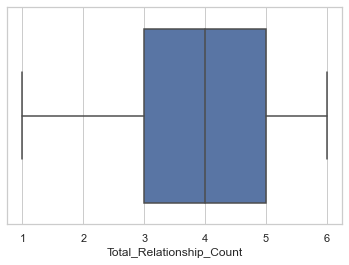

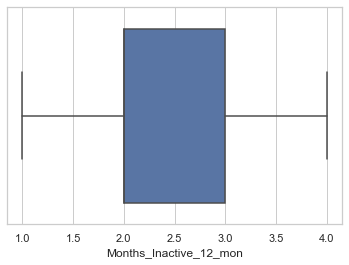

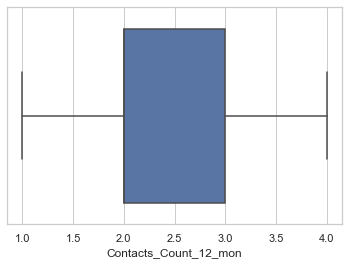

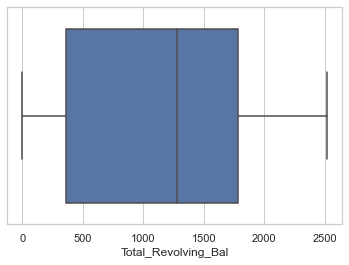

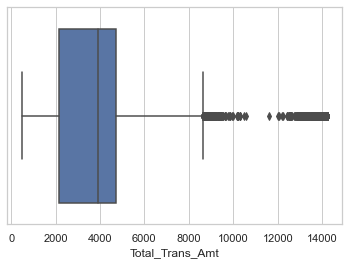

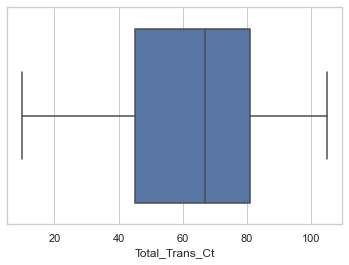

In [21]:
for i in numerical:
    sns.boxplot(df[i])
    plt.show()

The graphs look much better now, we can proceed further


### Checking for DUPLICATES

In [22]:
df.shape

(10127, 21)

In [23]:
df.CLIENTNUM.nunique()

10127

Hence the data has no duplicates and we can proceed further for the analysis

### Analysis

#### Calculating the basic statistics for the dataset

Here, our target variable is Attrition_Flag, let's check balance in data

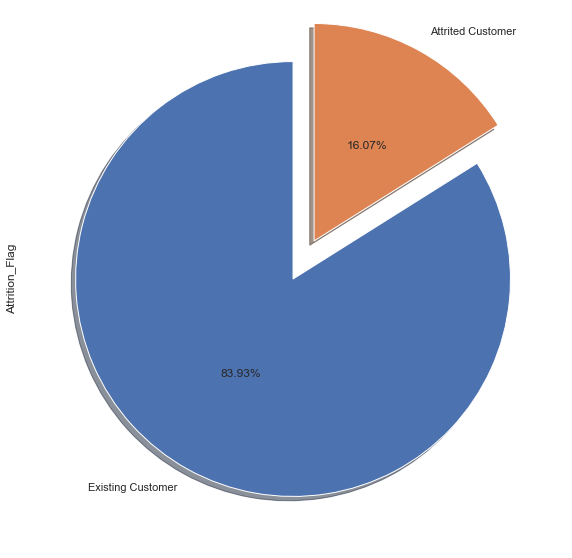

In [24]:
plt.figure(figsize=[10,10])
df.Attrition_Flag.value_counts(normalize=True).plot(kind = 'pie', explode = [0, 0.2], autopct = '%.2f%%',
                                         startangle = 90,shadow = True, pctdistance = 0.5)
plt.show()

The data appears to be highly imbalanced as just 16.07% of the customers are Attrited Customers

In [25]:
df.loc[:,df.columns[1:]].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.204503,2.346203,35.981633,3.812580,2.301965,2.466673,8631.953698,1162.814061,7410.790155,0.750846,4352.208749,64.285277,0.703069,0.274894
std,7.774698,1.298908,7.228970,1.554408,0.896181,0.971676,9088.776650,814.987335,8925.137158,0.168452,3230.488439,22.263666,0.181389,0.275691
min,26.000000,0.000000,22.000000,1.000000,1.000000,1.000000,1438.300000,0.000000,3.000000,0.463000,510.000000,10.000000,0.368000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,60.000000,5.000000,50.000000,6.000000,4.000000,4.000000,34516.000000,2517.000000,32183.400000,1.103000,14212.000000,105.000000,1.069000,0.999000


In [26]:
df.loc[:,df.columns[1:]].describe(include="object")

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## Univariate analysis

Let's look at some individual variables 

### Categorical Variables

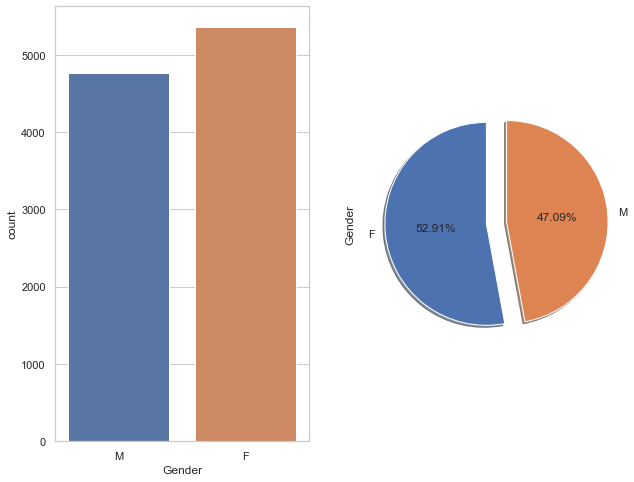

In [27]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.countplot(df.Gender)
plt.subplot(1,2,2)
df.Gender.value_counts(normalize=True).plot(kind = 'pie', explode = [0, 0.2], autopct = '%.2f%%',
                                         startangle = 90,shadow = True, pctdistance = 0.5)
plt.show()

53% of the customers are female while 47% customers are male

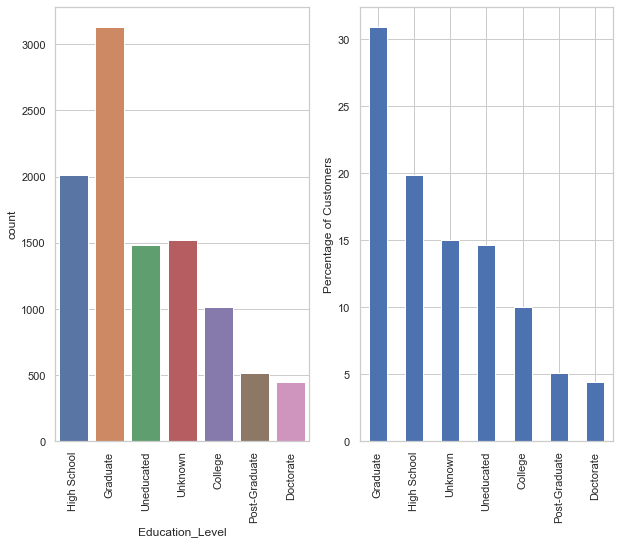

In [28]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.countplot(df.Education_Level)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(df.Education_Level.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("Percentage of Customers")
plt.show()

More than 30% of the customers are Graduates.

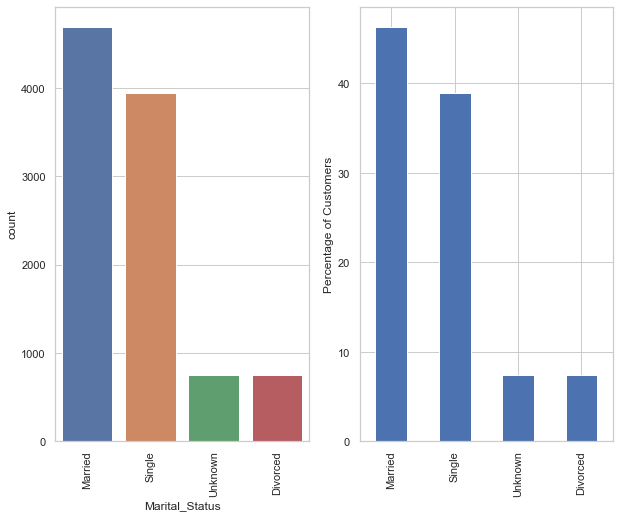

In [29]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.countplot(df.Marital_Status)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(df.Marital_Status.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("Percentage of Customers")
plt.show()

Almost 45% of the applicants are married

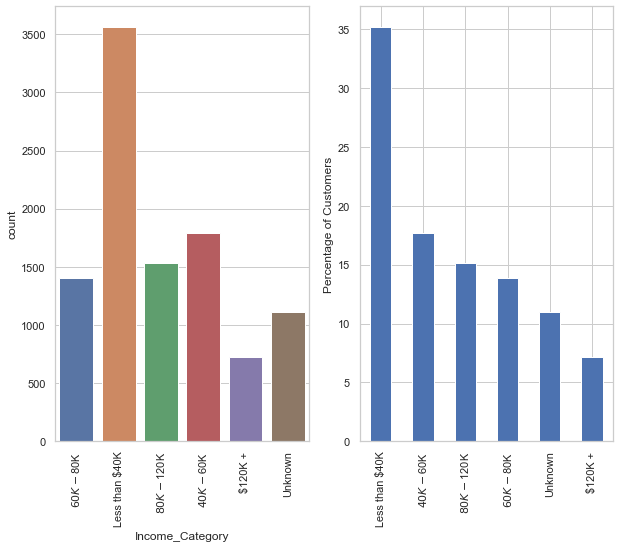

In [30]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.countplot(df.Income_Category)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(df.Income_Category.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("Percentage of Customers")
plt.show()

Majority of customers are earning less than $40K

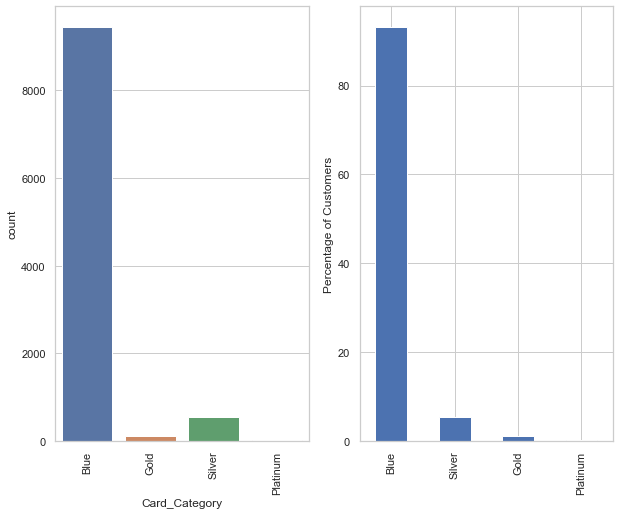

In [31]:
plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
sns.countplot(df.Card_Category)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
(df.Card_Category.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("Percentage of Customers")
plt.show()

More that 80% customers are Blue card owners

### Looking at the distributions for Continuous variable

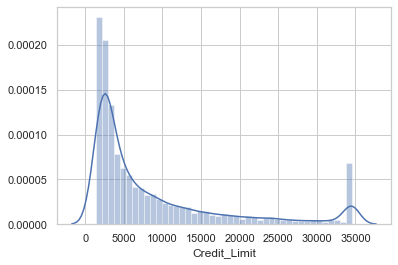

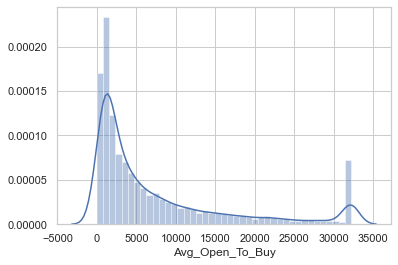

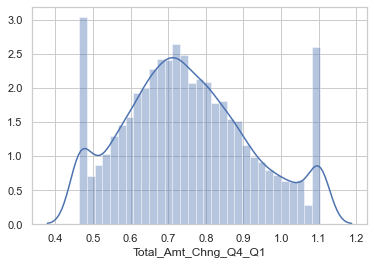

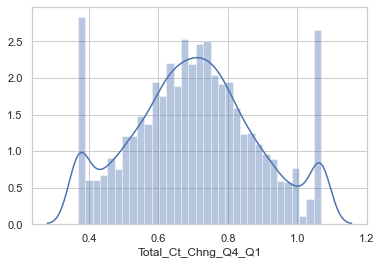

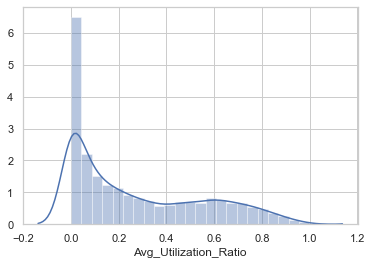

In [32]:
for i in df.select_dtypes("float").columns.values:
    sns.distplot(df[i])
    plt.show()

As we see, all of these variables have more than one mode

### Histogram for integer variables

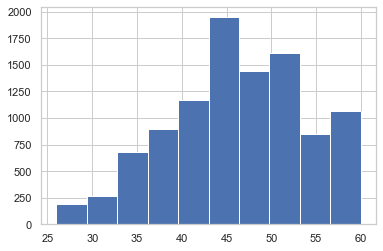

In [33]:
plt.hist(df.Customer_Age,bins=10)
plt.show()

Highest number of customers are aged between 43-45

In [34]:
l=['Customer_Age', 'Months_on_book', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct']

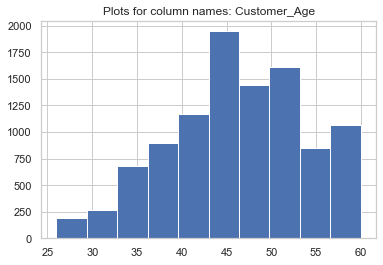

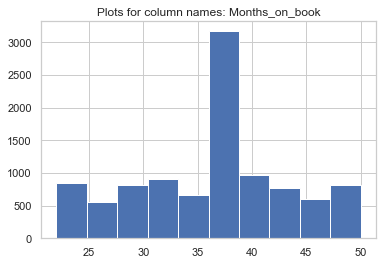

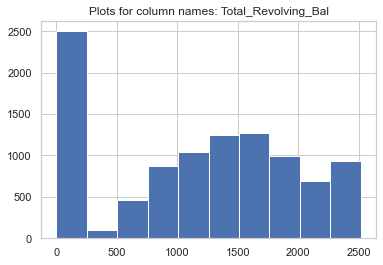

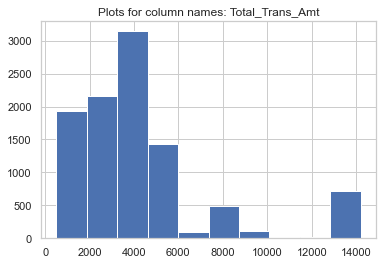

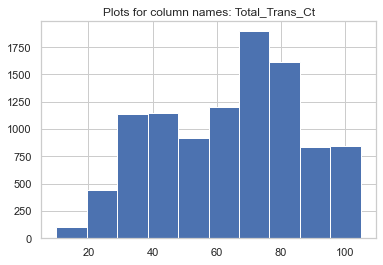

In [35]:
for i in l:
    plt.hist(df[i],bins=10)
    plt.title("Plots for column names: "+i)
    plt.show() 

In [36]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

Dividing the Datasets on the basis of Attrition_Flag

In [37]:
adf=df[df.Attrition_Flag=='Attrited Customer']

In [38]:
adf.shape

(1627, 21)

In [39]:
edf=df[df.Attrition_Flag=='Existing Customer']

In [40]:
edf.shape

(8500, 21)

### Segmented Univariate Analysis

How does gender affect Attrition_Flag

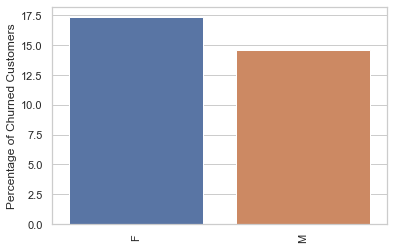

In [41]:
b=adf['Gender'].value_counts()/df['Gender'].value_counts()*100
b.sort_values(ascending=False,inplace=True)
sns.barplot(b.index,b.values)
plt.ylabel("Percentage of Churned Customers")
plt.xticks(rotation=90)
plt.show()

As we see, the % of Female churned customers are slightly more than % males churned customers

How does age affect Attrition_Flag

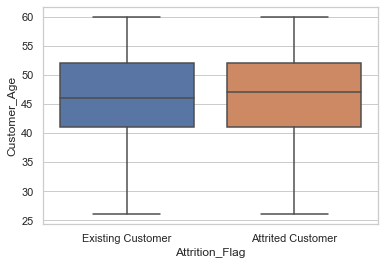

In [42]:
sns.boxplot(y=df.Customer_Age,x=df.Attrition_Flag)
plt.show()

As we see, there isn't much difference in the distribution of Age for Existing and Churned customers

How does Dependent_Count affect Attrition_Flag

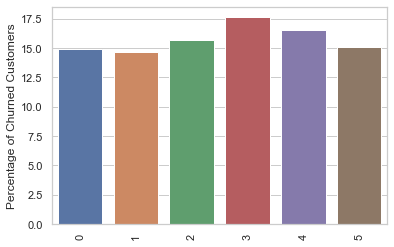

In [43]:
b=adf['Dependent_count'].value_counts()/df['Dependent_count'].value_counts()*100
b.sort_values(ascending=False,inplace=True)
sns.barplot(b.index,b.values)
plt.ylabel("Percentage of Churned Customers")
plt.xticks(rotation=90)
plt.show()

% of Churned Customers is slightly more for dependend count=3

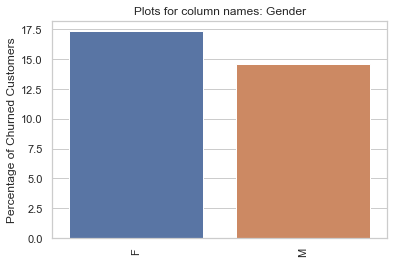

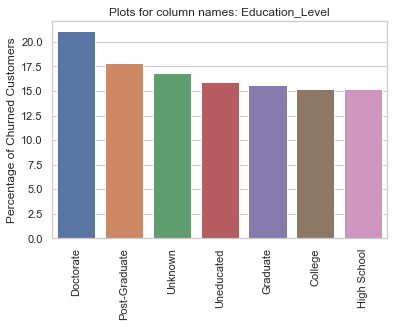

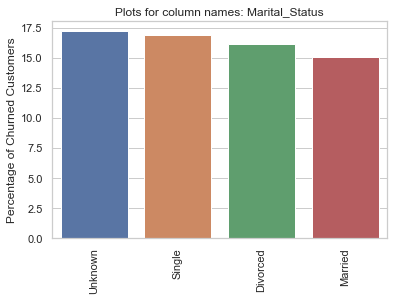

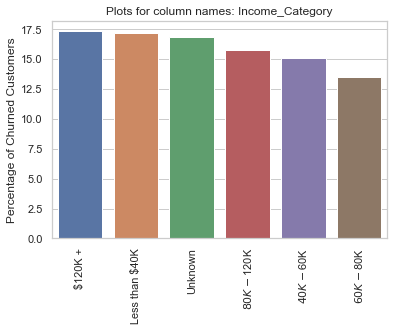

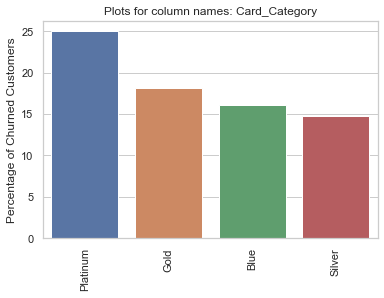

In [44]:
for i in df.select_dtypes("object").columns[1:]:
    b=adf[i].value_counts()/df[i].value_counts()*100
    b.sort_values(ascending=False,inplace=True)
    sns.barplot(b.index,b.values)
    plt.ylabel("Percentage of Churned Customers")
    plt.xticks(rotation=90)
    plt.title("Plots for column names: "+i)
    plt.show()


We notice a significant difference in the Columns:
    
    Card_Category: Churned rate is much more for Platinum customers (around 25%)
    
    Education Level: Churned rate is more for Doctorate level customers
    
    Income_Category: Churned rate is more for people earning more that 120K$ or people earning less that $40K compared to cutomers having middle ranged income

In [45]:
count=[i for i in df.columns if i.find('Count')>-1]+[i for i in df.columns if i.find('count')>-1]

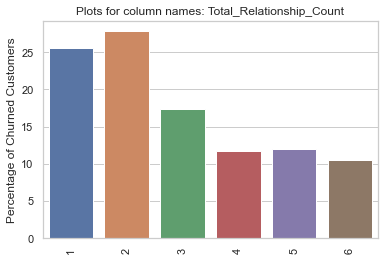

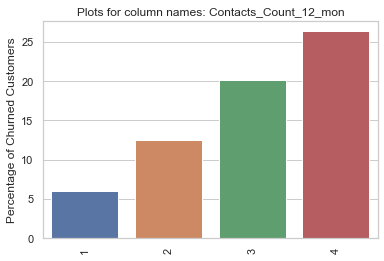

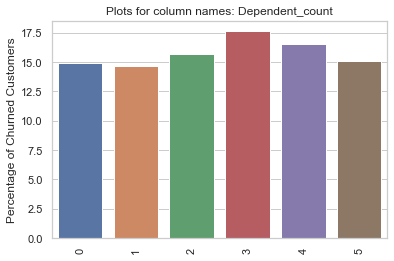

In [46]:
for i in count:
    b=adf[i].value_counts()/df[i].value_counts()*100
    b.sort_values(ascending=False,inplace=True)
    sns.barplot(b.index,b.values)
    plt.ylabel("Percentage of Churned Customers")
    plt.xticks(rotation=90)
    plt.title("Plots for column names: "+i)
    plt.show() 

As we see from the graphs, for columns:
    
    Total_Relationship_count: The churn rate is much more for relationship count 2, followed by 1 (more than 25%)
    
    Contacts_Count_12_mon: The churns rate is much more for count=4
    
    Dependent Count: Though there is much of differnce, count=3 has slightly more churn rate compared to others
    

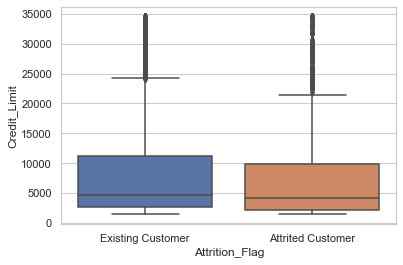

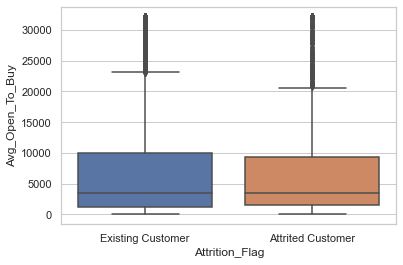

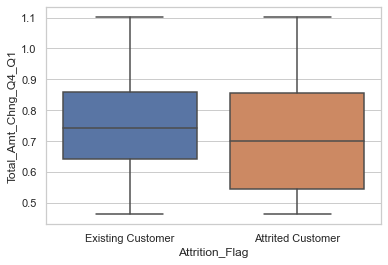

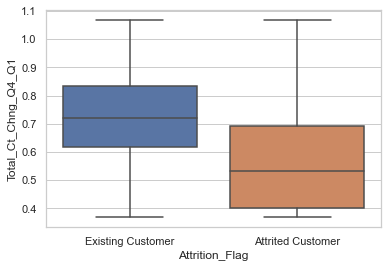

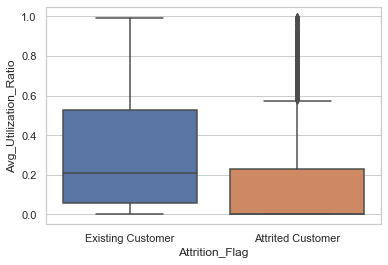

In [47]:
for i in df.select_dtypes("float"):
    sns.boxplot(y=df[i],x=df.Attrition_Flag)
    plt.show()

As we see from the above graphs,
We notice a significant difference in the distribution of the following variables:

    1.Total_Amt_Chng_Q4_Q1 (attrited customers have low Total_Amt_Chng_Q4_Q1 )
    
    2. Avg Utilization Ratio (75% of the Attrited customers have Avg_Utilization_Ratio less than 0.2)

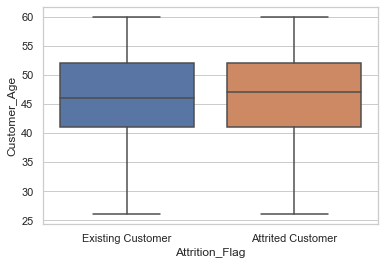

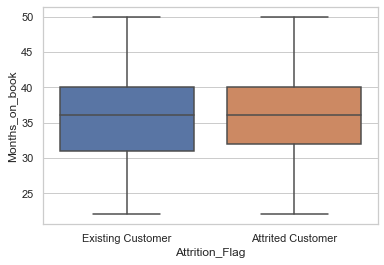

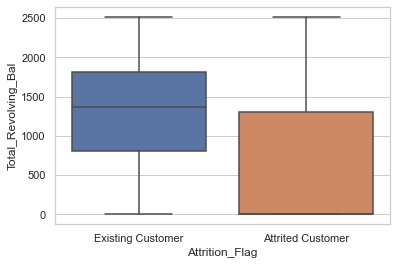

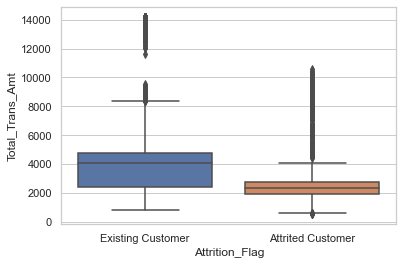

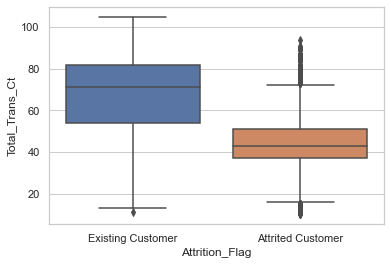

In [48]:
for i in ['Customer_Age', 'Months_on_book', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct']:
    sns.boxplot(y=df[i],x=df.Attrition_Flag)
    plt.show()
    

As we see from the above graphs,
We notice a significant difference in the distribution of the following variables:
    1. Total_Trans_Ct (attrited customers tend to have smaller transaction frequency than the existing customers)
    2. Total_Trans_Amt (attrited customers tend to have less amount of transactions.)
    3. Total_Revolving_Bal ( attrited customers tend to have less revolving balance than existing customers.)

### Finding correlation between the numerical variables and also the target variable(We will make a new column Target where Churned customers are 1 and non churned customers are 0)

In [49]:
df["Target"]=df.Attrition_Flag.apply(lambda x: 0 if x=="Existing Customer" else 1)

In [50]:
df.Target.value_counts()

0    8500
1    1627
Name: Target, dtype: int64

In [51]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

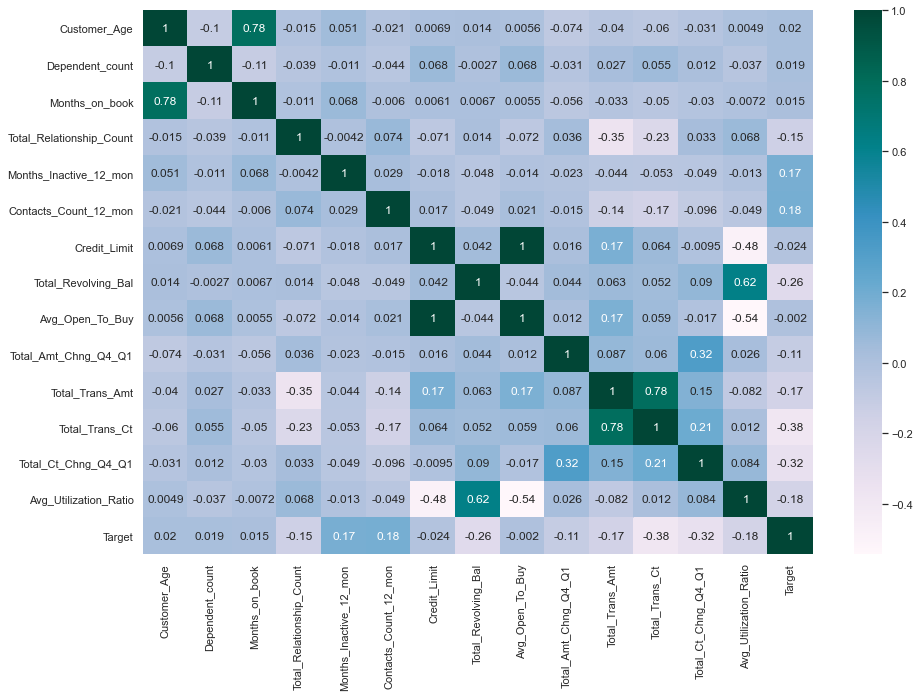

In [52]:
plt.figure(figsize=[15,10])
sns.heatmap(df.loc[:,df.columns[1:]].corr(),cmap="PuBuGn",annot=True)
plt.show()

In [53]:
correlation=df.loc[:,df.columns[1:]].corr()
correlation["Target"].apply(lambda x: abs(x)).sort_values(ascending=False)[1:]

Total_Trans_Ct              0.380301
Total_Ct_Chng_Q4_Q1         0.322173
Total_Revolving_Bal         0.263053
Contacts_Count_12_mon       0.183412
Avg_Utilization_Ratio       0.178410
Months_Inactive_12_mon      0.174552
Total_Trans_Amt             0.170269
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.106214
Credit_Limit                0.023873
Customer_Age                0.020278
Dependent_count             0.018991
Months_on_book              0.014541
Avg_Open_To_Buy             0.001964
Name: Target, dtype: float64

### Top correlations:

    Total_Trans_Ct              0.380301
    Total_Ct_Chng_Q4_Q1         0.322173
    Total_Revolving_Bal         0.263053
    Contacts_Count_12_mon       0.183412
    Avg_Utilization_Ratio       0.178410
    Months_Inactive_12_mon      0.174552
    Total_Trans_Amt             0.170269
    Total_Relationship_Count    0.150005
    Total_Amt_Chng_Q4_Q1        0.106214
    
We infered the same from the boxplots as well

### Doing a similar thing using anova

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [55]:
for i in df.select_dtypes("float"):
    model = ols('{} ~ Attrition_Flag'.format(i), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\n Anova table for column :"+i+"\n")
    print(anova_table)


 Anova table for column :Credit_Limit

                      sum_sq       df         F    PR(>F)
Attrition_Flag  4.767191e+08      1.0  5.773729  0.016285
Residual        8.359902e+11  10125.0       NaN       NaN

 Anova table for column :Avg_Open_To_Buy

                      sum_sq       df         F    PR(>F)
Attrition_Flag  3.110237e+06      1.0  0.039041  0.843371
Residual        8.066145e+11  10125.0       NaN       NaN

 Anova table for column :Total_Amt_Chng_Q4_Q1

                    sum_sq       df           F        PR(>F)
Attrition_Flag    3.241555      1.0  115.527842  8.411210e-27
Residual        284.093803  10125.0         NaN           NaN

 Anova table for column :Total_Ct_Chng_Q4_Q1

                    sum_sq       df            F         PR(>F)
Attrition_Flag   34.581010      1.0  1172.645841  2.828739e-243
Residual        298.583521  10125.0          NaN            NaN

 Anova table for column :Avg_Utilization_Ratio

                    sum_sq       df           F

#### Significant columns
Credit_Limit, Total_Amt_Chng_Q4_Q1, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio

In [56]:
for i in df.select_dtypes("int64").columns[1:]:
    model = ols('{} ~ Attrition_Flag'.format(i), data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\n Anova table for column :"+i+"\n")
    print(anova_table)


 Anova table for column :Customer_Age

                       sum_sq       df        F    PR(>F)
Attrition_Flag     251.695519      1.0  4.16528  0.041286
Residual        611823.779153  10125.0      NaN       NaN

 Anova table for column :Dependent_count

                      sum_sq       df         F    PR(>F)
Attrition_Flag      6.161297      1.0  3.652825  0.056002
Residual        17078.050217  10125.0       NaN       NaN

 Anova table for column :Months_on_book

                       sum_sq       df        F    PR(>F)
Attrition_Flag     111.883800      1.0  2.14123  0.143418
Residual        529052.699986  10125.0      NaN       NaN

 Anova table for column :Total_Relationship_Count

                      sum_sq       df           F        PR(>F)
Attrition_Flag    550.529612      1.0  233.072886  4.829281e-52
Residual        23915.747666  10125.0         NaN           NaN

 Anova table for column :Months_Inactive_12_mon

                     sum_sq       df           F        PR(

### Significant columns
Total_Trans_Ct, Total_Trans_Amt, Total_Revolving_Bal, Months_Inactive_12_mon, Contacts_Count_12_mon, Customer_Age

### Relationship between categorical variables and Attrition_Flag usnig Chi square test of indepenedence

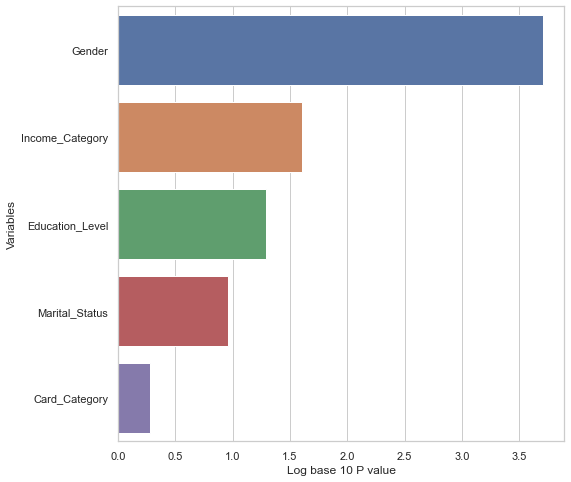

In [57]:
significant_variables=[]
for i in df.select_dtypes("object").columns:
    p=scipy.stats.chi2_contingency(pd.crosstab(df['Attrition_Flag'],df[i]))[1]
    if p!=0:
        significant_variables.append((i,abs(math.log10((p)))))

plot=pd.DataFrame(significant_variables,columns=('VARIABLE','P VALUE')).sort_values(by='P VALUE',ascending=False)
plt.figure(figsize=[8,8])
sns.barplot(x='P VALUE', y='VARIABLE', data=plot)
plt.xlabel("Log base 10 P value")
plt.ylabel("Variables")
plt.show()

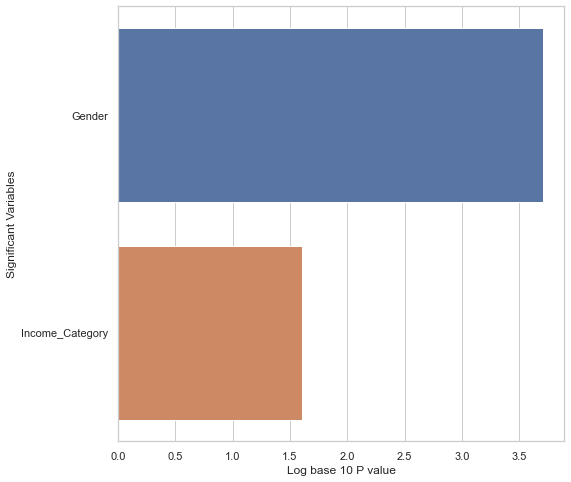

In [58]:
significant_variables=[]
for i in df.select_dtypes("object").columns:
    p=scipy.stats.chi2_contingency(pd.crosstab(df['Attrition_Flag'],df[i]))[1]
    if p<0.05 and p!=0:
        significant_variables.append((i,abs(math.log10((p)))))

plot=pd.DataFrame(significant_variables,columns=('VARIABLE','P VALUE')).sort_values(by='P VALUE',ascending=False)
plt.figure(figsize=[8,8])
sns.barplot(x='P VALUE', y='VARIABLE', data=plot)
plt.xlabel("Log base 10 P value")
plt.ylabel("Significant Variables")
plt.show()

Thus we see, Gender and Income_Category have significant relationship with the Attrition_Flag variable